In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2
from decimal import Decimal

def format_e(n):
    a = '%e' % Decimal(n)
    return a.split('e')[0].rstrip('0').rstrip('.')+'e'+a.split('e')[1]

def format_plt(n):
    a = '%e' % Decimal(n)
    return r'${'+a.split('e')[0].rstrip('0').rstrip('.')+'}}$'+r'${*10^{'+a.split('e')[1]+'}}$'

def comma_to_float(valstr):
    return float(valstr.decode('utf-8').replace(',','.'))

Anzahl der Messungen =  147


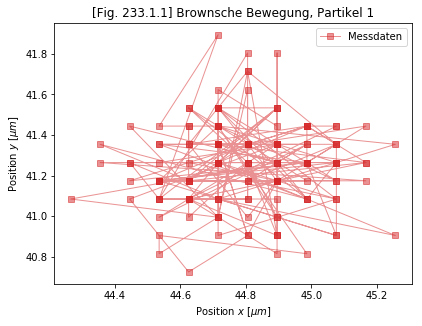

In [2]:
#Aufgabe 1, 1. Messung

#Messwerte aus Datei 1: x, y über t
t, x, y = np.loadtxt('data\Messung1.dat', skiprows=1, usecols=(1, 2, 3), converters= {1: comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack=True)
             
#Plot
fig, ax = plt.subplots(1, figsize=[6.4, 4.8])
plt.plot(x, y, lw=1, color='C3', marker='s', alpha=.50, label='Messdaten')
plt.title('[Fig. 233.1.1] Brownsche Bewegung, Partikel 1')
plt.xlabel('Position '+r'${x}$'+' '+r'${[{\mu}m]}$')
plt.ylabel('Position '+r'${y}$' + ' '+r'${[{\mu}m]}$')
plt.legend(loc='best')

fig.savefig('figures/223_Fig1_1.pdf', format='pdf', bbox_inches='tight')

#Auswertung
counts = x.size

#Ausgabe
print('Anzahl der Messungen = ', counts)

Anzahl der Messungen =  292
r_squared_mean [{\mu m}^2]=  1.607293e-01  +-  1.22529e-02
Delta_t_mean [s]=  1.000473e+00


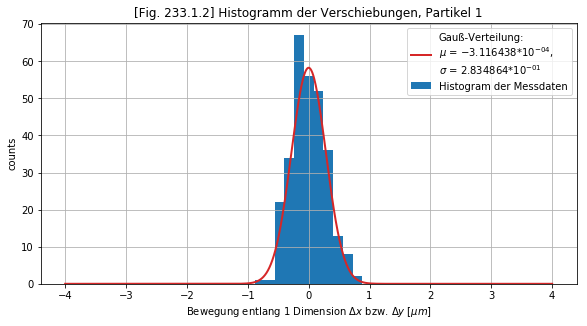

In [3]:
#Aufgabe 2 und 3, 1. Messung

Delta_t = np.array([])
dx = np.array([])
dy = np.array([])
i = 0
while i < t.size-1:
    Delta_t = np.append(Delta_t,t[i+1]-t[i])
    dx = np.append(dx,x[i+1]-x[i])
    dy = np.append(dy,y[i+1]-y[i])
    i = i+1
r_squared = dx**2+dy**2

r_squared_mean = np.mean(r_squared)
r_squared_mean_std = np.std(r_squared)/np.sqrt(r_squared.size)
Delta_t_mean = np.mean(Delta_t)

all_data = np.append(dx,dy)

counts = all_data.size
mu = np.mean(all_data)
sigma = np.std(all_data)

#Plot-Umgebung
x_fit = np.linspace(-4,4, 1000)
binwidth = sigma/2
x_bin = np.linspace((min(all_data))-binwidth/2, max(all_data)+binwidth/2, int((max(all_data)-min(all_data))/binwidth+1))
gauss = norm.pdf(x_fit, mu ,sigma)*counts*binwidth

#Plot
fig, ax = plt.subplots(1, figsize=[6.4 *1.5, 4.8])
plt.title('[Fig. 233.1.2] Histogramm der Verschiebungen, Partikel 1')
plt.xlabel('Bewegung entlang 1 Dimension '+r'${{\Delta}x}$'+' bzw. '+r'${{\Delta}y}$'+' '+r'${[{\mu}m]}$')
plt.ylabel('counts')
plt.hist(all_data, bins=x_bin, color='C0', label='Histogram der Messdaten')
plt.plot(x_fit, gauss, 'C3-', lw=2, label='Gauß-Verteilung:\n'+r'${\mu}$'+' = '+str(format_plt(mu))+',\n'+r'${\sigma}$'+' = '+str(format_plt(sigma)))
plt.grid(True)
plt.legend(loc='best')

fig.savefig('figures/223_Fig1_2.pdf', format='pdf', bbox_inches='tight')

#Ausgabe
print('Anzahl der Messungen = ', counts)
print('r_squared_mean [{\mu m}^2]= ', format_e(r_squared_mean), ' +- ', format_e(r_squared_mean_std))
print('Delta_t_mean [s]= ', format_e(Delta_t_mean))

Steigung:
S [{\mu m}^2 / s] = 1.722958e-01  +-  7.345589e-04
Chi-Quadrat = 8.264963700437779
Freiheitsgrade = 144
Chi-Quadrat reduziert = 0.05739558125304013
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 100.0 %


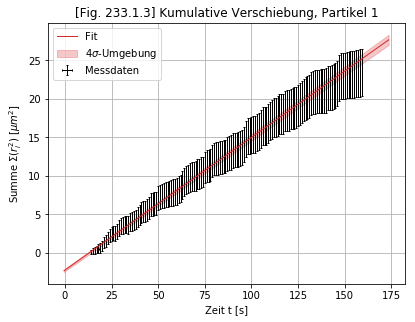

In [4]:
#Aufgabe 4, 1. Messung
R_particle = 4

counts = r_squared.size
r_kumm = np.cumsum(r_squared)

Fehler_t = np.zeros(counts)+ 0.001 /np.sqrt(2)
Fehler_dx = np.zeros(counts)+ (20/222)*R_particle /2
Fehler_dy = Fehler_dx
Fehler_r_squared = Fehler_dx*np.sqrt(2)
Fehler_r_kumm = np.sqrt(np.cumsum(Fehler_r_squared**2))

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (s, c) = p #s: Steigung, c: Nullwert
    return s*x+c

model = odr.Model(fit_func)

#darzustellende Daten
x = t[1:]
y = r_kumm
delta_x = Fehler_t
delta_y = Fehler_r_kumm

#Startparameter
para0 = [0, 0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 4 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+(max(x)-min(x))/10, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1, figsize=[6.4, 4.8])
plt.title('[Fig. 233.1.3] Kumulative Verschiebung, Partikel 1')
plt.grid(True)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.plot(x_fit, fit, 'C3', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, color='C3', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.xlabel('Zeit t [s]')
plt.ylabel('Summe $\Sigma (r_i^2)$ [${\mu m}^2$]')
plt.legend(loc='best')

fig.savefig('figures/223_Fig1_3.pdf', format='pdf', bbox_inches='tight')

#Chi-Quadrat orthogonal
dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Auswertung
s = popt[0]
Fehler_s = perr[0]

#Ausgabe
print('Steigung:')
print('S [{\mu m}^2 / s] =', format_e(s), ' +- ', format_e(Fehler_s))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

Anzahl der Messungen =  147


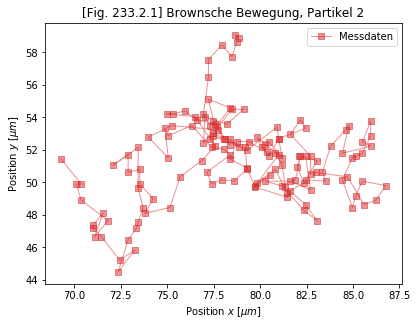

In [5]:
#Aufgabe 1, Partikel 2

#Messwerte aus Datei 2: x, y über t
t, x, y = np.loadtxt('data\Messung2.dat', skiprows=1, usecols=(1, 2, 3), converters= {1: comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack=True)
                    
#Plot
fig, ax = plt.subplots(1, figsize=[6.4, 4.8])
plt.plot(x, y, lw=1, color='C3', marker='s', alpha=.50, label='Messdaten')
plt.title('[Fig. 233.2.1] Brownsche Bewegung, Partikel 2')
plt.xlabel('Position '+r'${x}$'+' '+r'${[{\mu}m]}$')
plt.ylabel('Position '+r'${y}$' + ' '+r'${[{\mu}m]}$')
plt.legend(loc='best')

fig.savefig('figures/223_Fig2_1.pdf', format='pdf', bbox_inches='tight')

#Auswertung
counts = x.size

#Ausgabe
print('Anzahl der Messungen = ', counts)

Anzahl der Messungen =  292
r_squared_mean [{\mu m}^2]=  1.574166e+00  +-  1.087616e-01
Delta_t_mean [s]=  1.000473e+00


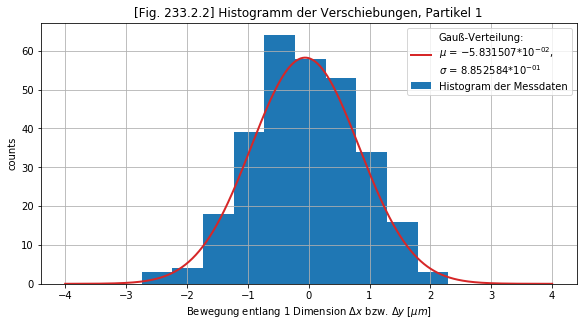

In [6]:
#Aufgabe 2 und 3, Partikel 2

Delta_t = np.array([])
dx = np.array([])
dy = np.array([])
i = 0
while i < t.size-1:
    Delta_t = np.append(Delta_t,t[i+1]-t[i])
    dx = np.append(dx,x[i+1]-x[i])
    dy = np.append(dy,y[i+1]-y[i])
    i = i+1
r_squared = dx**2+dy**2

r_squared_mean = np.mean(r_squared)
r_squared_mean_std = np.std(r_squared)/np.sqrt(r_squared.size)
Delta_t_mean = np.mean(Delta_t)

all_data = np.append(dx,dy)

counts = all_data.size
mu = np.mean(all_data)
sigma = np.std(all_data)

#Plot-Umgebung
x_fit = np.linspace(-4,4, 1000)
binwidth = sigma/2
x_bin = np.linspace((min(all_data))-binwidth/2, max(all_data)+binwidth/2, int((max(all_data)-min(all_data))/binwidth+1))
gauss = norm.pdf(x_fit, mu ,sigma)*counts*binwidth

#Plot
fig, ax = plt.subplots(1, figsize=[6.4 *1.5, 4.8])
plt.title('[Fig. 233.2.2] Histogramm der Verschiebungen, Partikel 1')
plt.xlabel('Bewegung entlang 1 Dimension '+r'${{\Delta}x}$'+' bzw. '+r'${{\Delta}y}$'+' '+r'${[{\mu}m]}$')
plt.ylabel('counts')
plt.hist(all_data, bins=x_bin, color='C0', label='Histogram der Messdaten')
plt.plot(x_fit, gauss, 'C3-', lw=2, label='Gauß-Verteilung:\n'+r'${\mu}$'+' = '+str(format_plt(mu))+',\n'+r'${\sigma}$'+' = '+str(format_plt(sigma)))
plt.grid(True)
plt.legend(loc='best')

fig.savefig('figures/223_Fig2_2.pdf', format='pdf', bbox_inches='tight')

#Ausgabe
print('Anzahl der Messungen = ', counts)
print('r_squared_mean [{\mu m}^2]= ', format_e(r_squared_mean), ' +- ', format_e(r_squared_mean_std))
print('Delta_t_mean [s]= ', format_e(Delta_t_mean))

Steigung:
S [{\mu m}^2 / s] = 1.54953e+00  +-  5.91124e-03
Chi-Quadrat = 141.5498219076475
Freiheitsgrade = 144
Chi-Quadrat reduziert = 0.9829848743586632
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 54.0 %


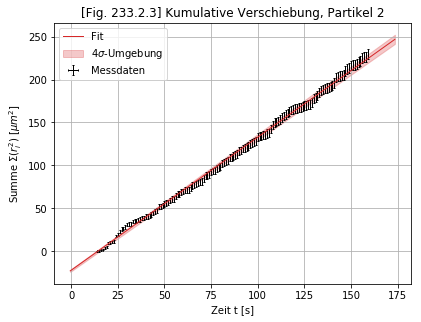

In [7]:
#Aufgabe 4, Partikel 2
R_particle = 11

counts = r_squared.size
r_kumm = np.cumsum(r_squared)

Fehler_t = np.zeros(counts)+ 0.001 /np.sqrt(2)
Fehler_dx = np.zeros(counts)+ (20/222)*R_particle /2
Fehler_dy = Fehler_dx
Fehler_r_squared = Fehler_dx
Fehler_r_kumm = np.sqrt(np.cumsum(Fehler_r_squared**2))

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (s, c) = p #s: Steigung, c: Nullwert
    return s*x+c

model = odr.Model(fit_func)

#darzustellende Daten
x = t[1:]
y = r_kumm
delta_x = Fehler_t
delta_y = Fehler_r_kumm

#Startparameter
para0 = [0, 0]

data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()

#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 4 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+(max(x)-min(x))/10, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1, figsize=[6.4, 4.8])
plt.title('[Fig. 233.2.3] Kumulative Verschiebung, Partikel 2')
plt.grid(True)
plt.errorbar(x, y, yerr=delta_y, xerr=delta_x, lw=1, ecolor='k', fmt='none', capsize=1, label='Messdaten')
plt.plot(x_fit, fit, 'C3', lw=1, label='Fit')
ax.fill_between(x_fit, fit_top, fit_bot, color='C3', alpha=.25, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.xlabel('Zeit t [s]')
plt.ylabel('Summe $\Sigma (r_i^2)$ [${\mu m}^2$]')
plt.legend(loc='best')

fig.savefig('figures/223_Fig2_3.pdf', format='pdf', bbox_inches='tight')

#Chi-Quadrat orthogonal
dof = x.size-popt.size
chisquare = np.sum(((fit_func(popt, x)-y)**2)/(delta_y**2+((fit_func(popt, x+delta_x)-fit_func(popt, x-delta_x))/2)**2))
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Auswertung
s = popt[0]
Fehler_s = perr[0]

#Ausgabe
print('Steigung:')
print('S [{\mu m}^2 / s] =', format_e(s), ' +- ', format_e(Fehler_s))
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')